Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Convergencia alcanzada.


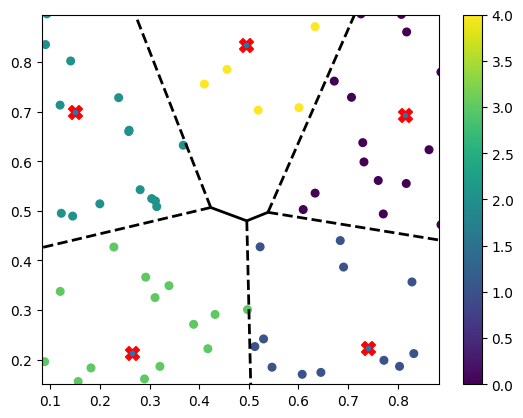

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import cdist

def voronoi_clustering_random_init(points, k, max_iter=100):
    np.random.seed(1234)
    # Inicialización aleatoria de los centroides
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    for iteration in range(max_iter):
        print(f"Iteración {iteration + 1}")

        # Calcular el diagrama de Voronoi
        vor = Voronoi(centroids)

        # Asignar puntos a las celdas de Voronoi más cercanas
        labels = np.argmin(cdist(points, centroids), axis=1)

        # Recalcular los centroides como el promedio de los puntos en cada celda
        new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])

        # Verificar convergencia
        if np.allclose(centroids, new_centroids, atol=1e-4):
            print("Convergencia alcanzada.")
            break

        centroids = new_centroids

    return labels, vor, centroids

# Generar datos de ejemplo
np.random.seed(42)
points = np.random.rand(100, 2)
k = 5
labels, vor, centroids = voronoi_clustering_random_init(points, k)

# Visualización
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2)
scatter = ax.scatter(points[:,0], points[:,1], c=labels, cmap='viridis', s=30)
ax.scatter(centroids[:,0], centroids[:,1], c='red', s=100, marker='X')
plt.colorbar(scatter)
plt.show()


In [ ]:
from sklearn.datasets import make_moons, make_blobs, make_circles
#Generar diferentes conjuntos de datos
def GenerateDatasets(selectedNoise, nClusters, clusterStd = 0.6):

    # Datos tipo círculos
    X_circles, _ = make_circles(n_samples=1000, factor=0.3, noise=selectedNoise, random_state=0)

    # Datos tipo blobs
    X_blobs, _ = make_blobs(n_samples=1000, centers=nClusters, cluster_std=clusterStd, random_state=0)

    # Datos tipo lunas
    X_moons, _ = make_moons(n_samples=1000, noise=selectedNoise, random_state=0)

    return X_circles, X_blobs, X_moons

def PlotExecution(X, centroidsX, voronoiX):
  # Visualización
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Subgráfica 1: Clustering con los puntos y centroides
  ax[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
  ax[0].scatter(centroidsX[:, 0], centroidsX[:, 1], c='red', s=200, marker='x')
  ax[0].set_title('Clustering basado en Voronoi')
  ax[0].set_xlabel('X')
  ax[0].set_ylabel('Y')

  # Subgráfica 2: Diagrama de Voronoi
  voronoi_plot_2d(voronoiX, ax=ax[1], show_vertices=False, line_colors='black', line_width=2)
  ax[1].set_title('Diagrama de Voronoi')
  ax[1].set_xlabel('X')
  ax[1].set_ylabel('Y')

  plt.tight_layout()
  plt.show()

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Convergencia alcanzada.


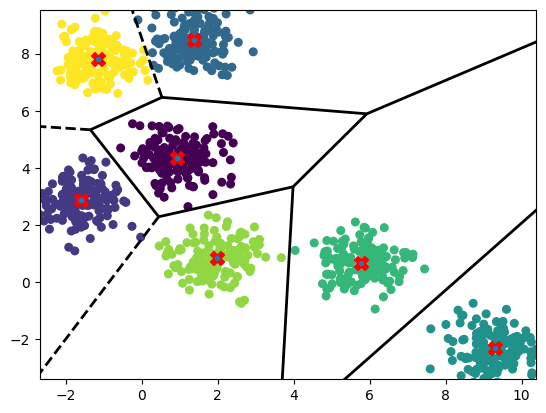

In [ ]:
# Generar datos de ejemplo
blobClusters = 7
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.05, blobClusters)

labels, vor, centroids = voronoi_clustering_random_init(X_blobs, blobClusters)

# Visualización
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2)
scatter = ax.scatter(X_blobs[:,0], X_blobs[:,1], c=labels, cmap='viridis', s=30)
ax.scatter(centroids[:,0], centroids[:,1], c='red', s=100, marker='X')
plt.show()

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Convergencia alcanzada.


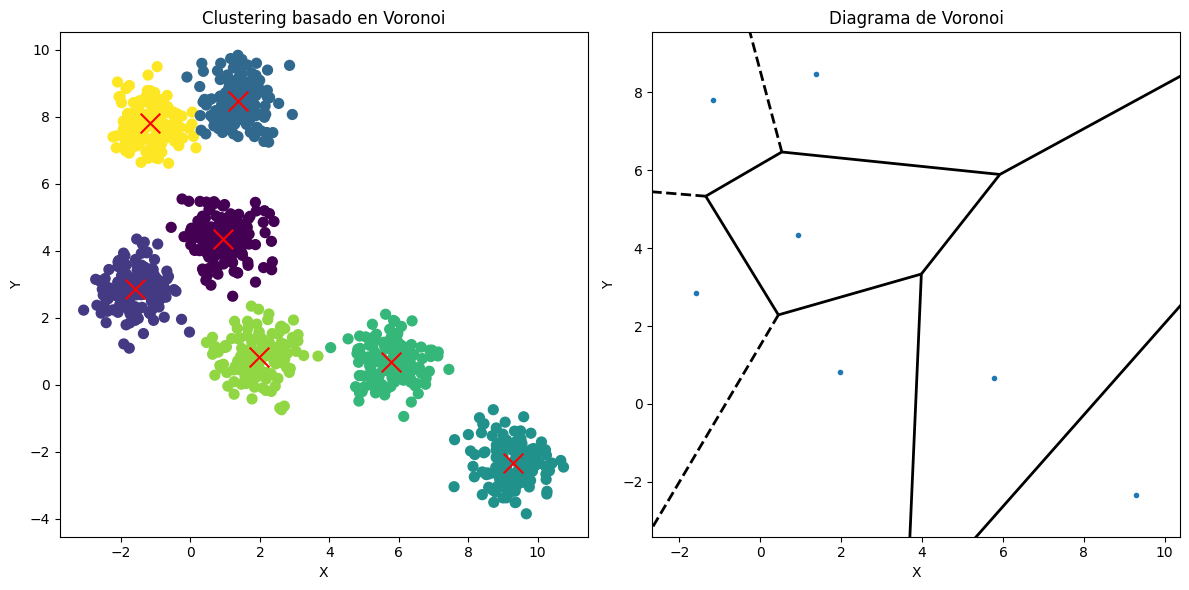

In [ ]:
labels, vor, centroids = voronoi_clustering_random_init(X_blobs, blobClusters)
# Visualización
PlotExecution(X_blobs, centroids, vor)

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Convergencia alcanzada.


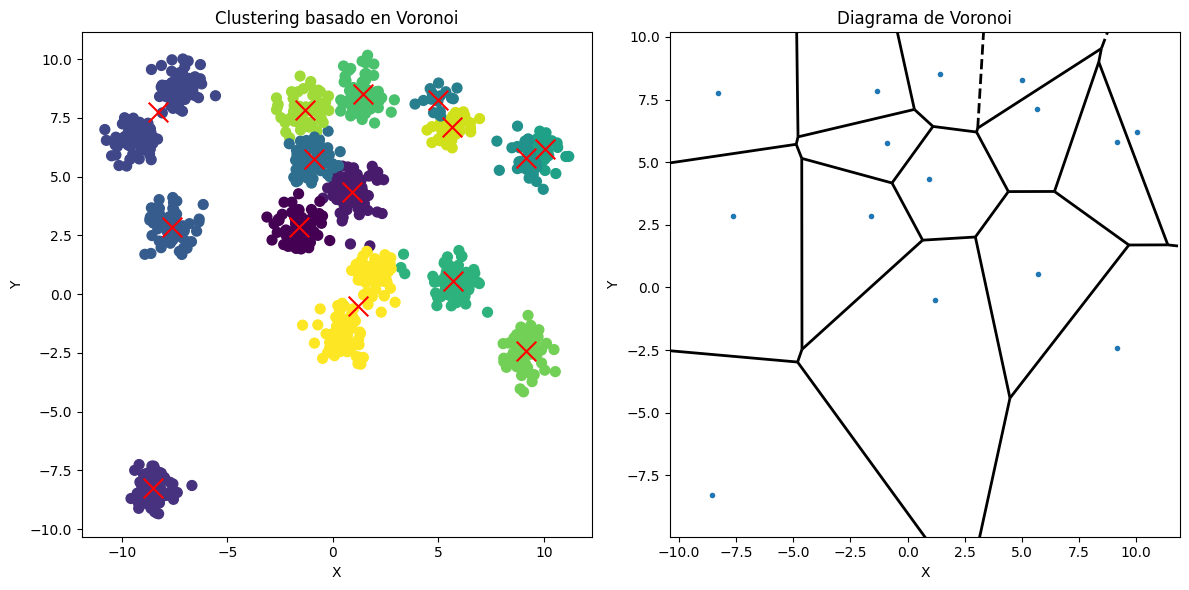

In [ ]:
blobClusters = 15
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.0, blobClusters)
labels, vor, centroids = voronoi_clustering_random_init(X_blobs, blobClusters)
# Visualización
PlotExecution(X_blobs, centroids, vor)

In [ ]:
def kmeans_plus_plus_initialization(points, k):
    """Inicializa los centroides usando el método K-Means++."""
    np.random.seed(1234)
    centroids = np.zeros((k, points.shape[1]))

    # Elegir el primer centroide aleatoriamente
    centroids[0] = points[np.random.choice(points.shape[0])]

    for i in range(1, k):
        # Calcular distancias al centroide más cercano
        distances = np.min(cdist(points, centroids[:i]), axis=1)
        # Elegir el siguiente centroide con probabilidad proporcional a la distancia al cuadrado
        probabilities = distances ** 2
        probabilities /= probabilities.sum()
        centroids[i] = points[np.random.choice(points.shape[0], p=probabilities)]

    return centroids

def voronoi_clustering_kmeans_plus(points, k, max_iter=100):
    # Inicialización usando K-Means++
    centroids = kmeans_plus_plus_initialization(points, k)

    for iteration in range(max_iter):
        print(f"Iteración {iteration + 1}")

        # Calcular el diagrama de Voronoi
        vor = Voronoi(centroids)

        # Asignar puntos a las celdas de Voronoi más cercanas
        labels = np.argmin(cdist(points, centroids), axis=1)

        # Recalcular los centroides como el promedio de los puntos en cada celda
        new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])

        # Verificar convergencia
        if np.allclose(centroids, new_centroids, atol=1e-4):
            print("Convergencia alcanzada.")
            break

        centroids = new_centroids

    return labels, vor, centroids

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Convergencia alcanzada.


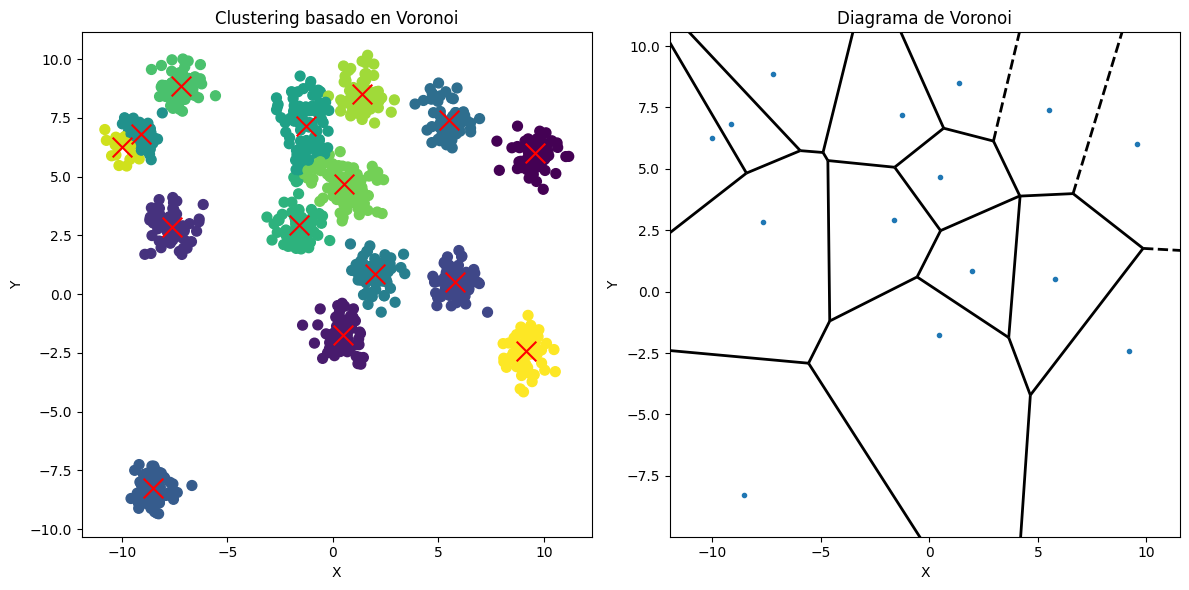

In [ ]:
labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters)
# Visualización
PlotExecution(X_blobs, centroids, vor)

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Convergencia alcanzada.


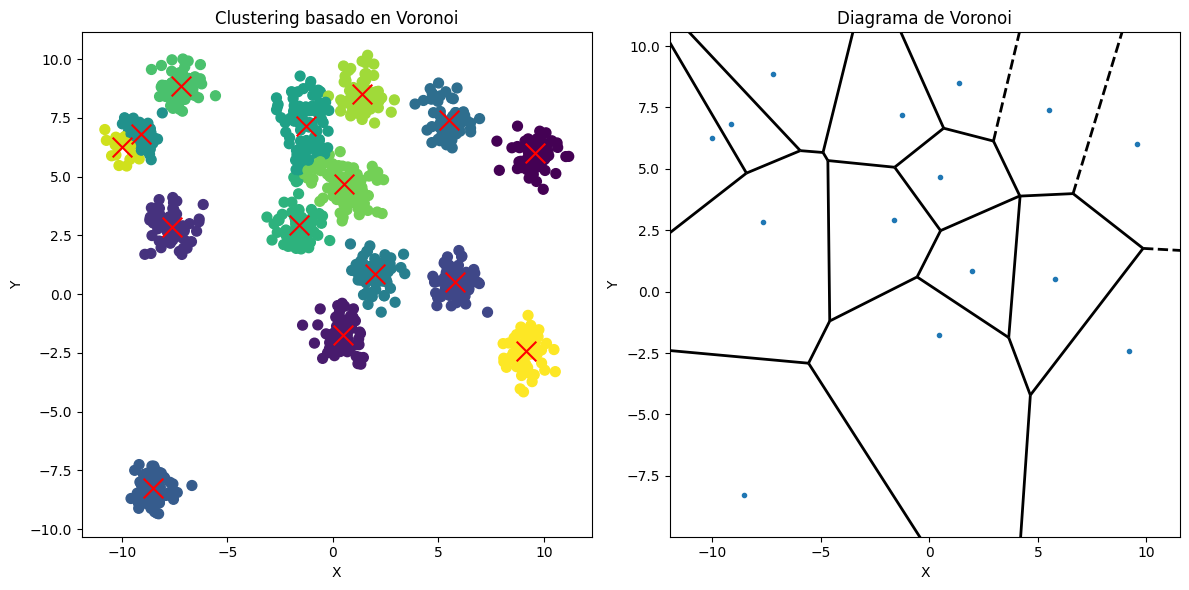

In [ ]:
blobClusters = 15
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.0, blobClusters)
labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters)
# Visualización
PlotExecution(X_blobs, centroids, vor)

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Convergencia alcanzada.


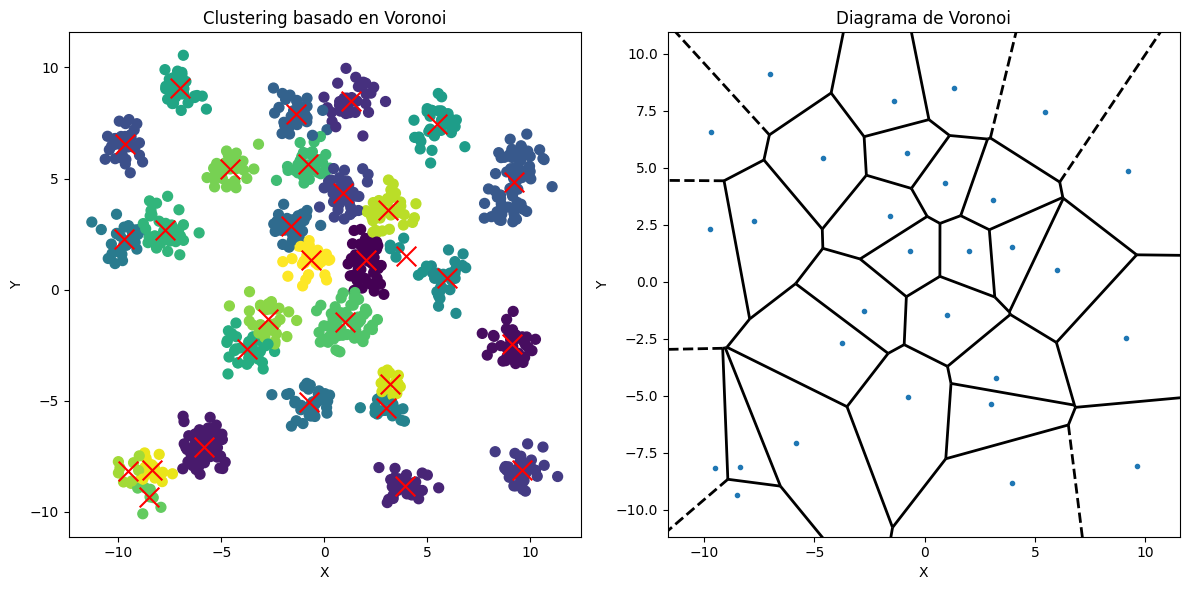

In [ ]:
blobClusters = 30
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.0, blobClusters)
labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters)
# Visualización
PlotExecution(X_blobs, centroids, vor)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


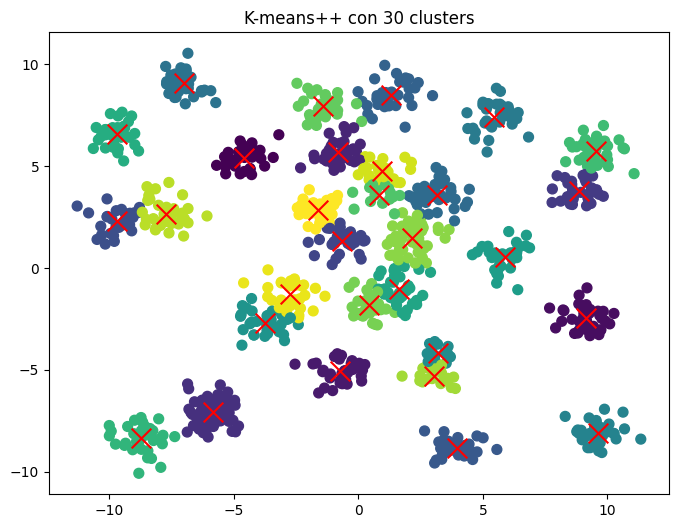

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Ejecutar K-means++ para agrupar los blobs en 30 clusters
kmeans = KMeans(n_clusters=blobClusters, init='k-means++', random_state=42)
kmeans.fit(X_blobs)

# Obtener los centroides y etiquetas
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualización de los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')  # Centroides en rojo
plt.title('K-means++ con 30 clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el índice de Silhouette para el resultado de K-means++
silhouette_kmeans = silhouette_score(X_blobs, labels)
print(f"Índice de Silhouette para K-means++: {silhouette_kmeans:.4f}")
labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters)
silhouette_voronoi = silhouette_score(X_blobs, labels)
print(f"Índice de Silhouette para Voronoi Clustering: {silhouette_voronoi:.4f}")

Índice de Silhouette para K-means++: 0.5630
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Convergencia alcanzada.
Índice de Silhouette para Voronoi Clustering: 0.5638


In [ ]:
blobClusters =30
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.05, blobClusters)

kmeans = KMeans(n_clusters=blobClusters, init='k-means++', random_state=1234)
kmeans.fit(X_blobs)

# Obtener los centroides y etiquetas
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
silhouette_kmeans = silhouette_score(X_blobs, labels)
print(f"Índice de Silhouette para K-means++: {silhouette_kmeans:.4f}")
labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters)
silhouette_voronoi = silhouette_score(X_blobs, labels)
print(f"Índice de Silhouette para Voronoi Clustering: {silhouette_voronoi:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silhouette para K-means++: 0.5578
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Convergencia alcanzada.
Índice de Silhouette para Voronoi Clustering: 0.5638


In [ ]:
blobClusters =40
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.0, blobClusters)

kmeans = KMeans(n_clusters=blobClusters, init='k-means++', random_state=1234)
kmeans.fit(X_blobs)

# Obtener los centroides y etiquetas
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
silhouette_kmeans = silhouette_score(X_blobs, labels)
print(f"Índice de Silhouette para K-means++: {silhouette_kmeans:.4f}")
labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters)
silhouette_voronoi = silhouette_score(X_blobs, labels)
print(f"Índice de Silhouette para Voronoi Clustering: {silhouette_voronoi:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silhouette para K-means++: 0.4678
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Convergencia alcanzada.
Índice de Silhouette para Voronoi Clustering: 0.4867


In [ ]:
def CompareSilhouette(blobClusters):
  # Generar datasets
  X_circles, X_blobs, X_moons = GenerateDatasets(0.0, blobClusters)

  kmeans = KMeans(n_clusters=blobClusters, init='k-means++', random_state=1234, n_init = 10)
  kmeans.fit(X_blobs)

  # Obtener los centroides y etiquetas
  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_
  silhouette_kmeans = silhouette_score(X_blobs, labels)
  print(f"Índice de Silhouette para K-means++: {silhouette_kmeans:.4f}")
  labels, vor, centroids = voronoi_clustering_kmeans_plus(X_blobs, blobClusters, n_init = 10)
  silhouette_voronoi = silhouette_score(X_blobs, labels)
  print(f"Índice de Silhouette para Voronoi Clustering: {silhouette_voronoi:.4f}")
  return silhouette_kmeans, silhouette_voronoi

In [ ]:
import numpy as np
from scipy.spatial import Voronoi
from scipy.spatial.distance import cdist

def kmeans_plus_plus_initialization(points, k):
    """Inicializa los centroides usando el método K-Means++."""
    centroids = np.zeros((k, points.shape[1]))

    # Elegir el primer centroide aleatoriamente
    centroids[0] = points[np.random.choice(points.shape[0])]

    for i in range(1, k):
        # Calcular distancias al centroide más cercano
        distances = np.min(cdist(points, centroids[:i]), axis=1)
        # Elegir el siguiente centroide con probabilidad proporcional a la distancia al cuadrado
        probabilities = distances ** 2
        probabilities /= probabilities.sum()
        centroids[i] = points[np.random.choice(points.shape[0], p=probabilities)]

    return centroids

def compute_inertia(points, centroids, labels):
    """Calcula la inercia (suma de las distancias al cuadrado de cada punto a su centroide)."""
    return np.sum([np.sum((points[labels == i] - centroids[i]) ** 2) for i in range(len(centroids))])

def voronoi_clustering_kmeans_plus(points, k, max_iter=100, n_init=10):
    np.random.seed(1234)
    best_inertia = np.inf
    best_labels = None
    best_centroids = None
    best_vor = None
    current_iter = 0
    min_iter = max_iter

    for init in range(n_init):
        # Inicialización usando K-Means++
        centroids = kmeans_plus_plus_initialization(points, k)

        for iteration in range(max_iter):
            # Calcular el diagrama de Voronoi
            vor = Voronoi(centroids)

            # Asignar puntos a las celdas de Voronoi más cercanas
            labels = np.argmin(cdist(points, centroids), axis=1)

            # Recalcular los centroides como el promedio de los puntos en cada celda
            new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])

            # Verificar convergencia
            if np.allclose(centroids, new_centroids, atol=1e-4):
                current_iter = iteration
                break

            centroids = new_centroids

        # Calcular la inercia de esta solución
        inertia = compute_inertia(points, centroids, labels)

        # Actualizar si es la mejor solución encontrada
        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = labels
            best_centroids = centroids
            best_vor = vor
            min_iter = current_iter
    return best_labels, best_vor, best_centroids, min_iter


In [ ]:
def CompareSilhouette(selectedNoise, blobClusters, clusterStd = 0.6, n_init = 10, printFlag = True):
  # Generar datasets
  X_circles, X_blobs, X_moons = GenerateDatasets(selectedNoise, blobClusters, clusterStd)

  kmeans = KMeans(n_clusters=blobClusters, init='k-means++', random_state=1234, n_init = n_init, max_iter=100)
  kmeans.fit(X_blobs)

  # Obtener los centroides y etiquetas
  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_
  silhouette_kmeans = silhouette_score(X_blobs, labels)
  if(printFlag):
    print(f"Índice de Silhouette para K-means++: {silhouette_kmeans:.4f}")
  labels, vor, centroids, min_iter = voronoi_clustering_kmeans_plus(X_blobs, blobClusters, n_init = n_init)
  silhouette_voronoi = silhouette_score(X_blobs, labels)
  if(printFlag):
    print(f"Índice de Silhouette para Voronoi Clustering: {silhouette_voronoi:.4f}")
  return silhouette_kmeans, silhouette_voronoi, min_iter, kmeans.n_iter_

In [ ]:
CompareSilhouette(0, 40)

Índice de Silhouette para K-means++: 0.4678
Índice de Silhouette para Voronoi Clustering: 0.4648


(0.46780896439561637, 0.4648040699755851, 7, 6)

Índice de Silhouette para K-means++: 0.7157
Índice de Silhouette para Voronoi Clustering: 0.7157
Índice de Silhouette para K-means++: 0.7262
Índice de Silhouette para Voronoi Clustering: 0.7262
Índice de Silhouette para K-means++: 0.6664
Índice de Silhouette para Voronoi Clustering: 0.6664
Índice de Silhouette para K-means++: 0.5916
Índice de Silhouette para Voronoi Clustering: 0.5797
Índice de Silhouette para K-means++: 0.5735
Índice de Silhouette para Voronoi Clustering: 0.5550
Índice de Silhouette para K-means++: 0.5578
Índice de Silhouette para Voronoi Clustering: 0.5545
Índice de Silhouette para K-means++: 0.5288
Índice de Silhouette para Voronoi Clustering: 0.5005
Índice de Silhouette para K-means++: 0.4678
Índice de Silhouette para Voronoi Clustering: 0.4648
Índice de Silhouette para K-means++: 0.4433
Índice de Silhouette para Voronoi Clustering: 0.4485
Índice de Silhouette para K-means++: 0.4445
Índice de Silhouette para Voronoi Clustering: 0.4387
Índice de Silhouette para K-me

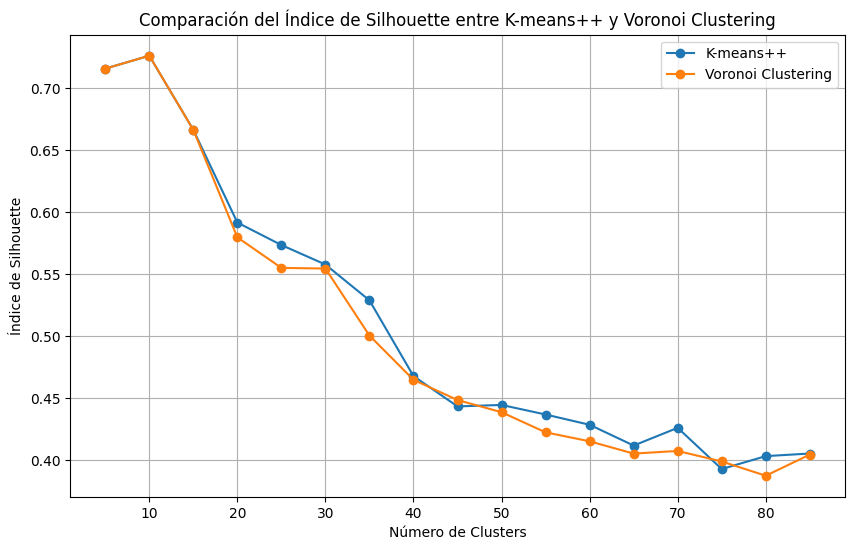

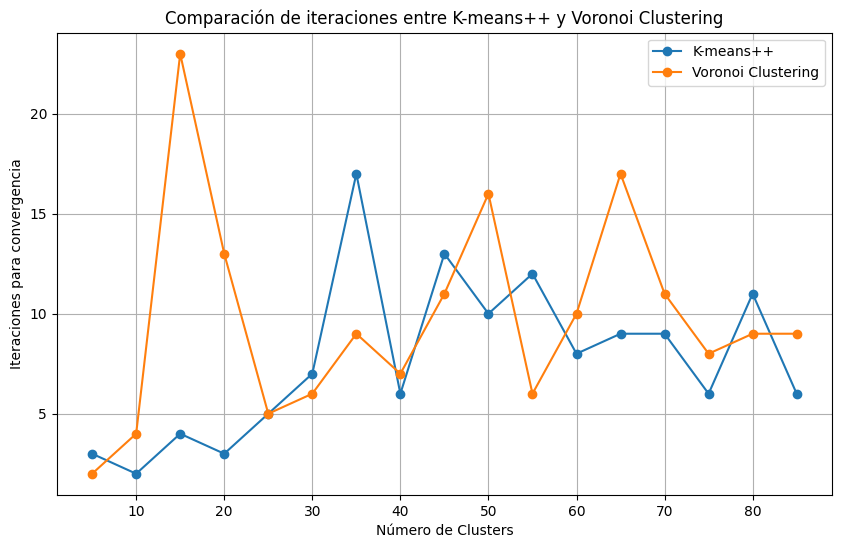

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores de clusters
cluster_range = list(range(5, 90, 5))

silhouette_kmeans_values = []
silhouette_voronoi_values = []
min_iter_kmeans_values = []
min_iter_voronoi_values = []


# Ejecutar CompareSilhouette para cada valor en el rango
for clusters in cluster_range:
    silhouette_kmeans, silhouette_voronoi, min_iter_voronoi, min_iter_kmeans = CompareSilhouette(0, clusters)
    silhouette_kmeans_values.append(silhouette_kmeans)
    silhouette_voronoi_values.append(silhouette_voronoi)
    min_iter_kmeans_values.append(min_iter_kmeans)
    min_iter_voronoi_values.append(min_iter_voronoi)


# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_kmeans_values, label='K-means++', marker='o')
plt.plot(cluster_range, silhouette_voronoi_values, label='Voronoi Clustering', marker='o')

plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhouette')
plt.title('Comparación del Índice de Silhouette entre K-means++ y Voronoi Clustering')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, min_iter_kmeans_values, label='K-means++', marker='o')
plt.plot(cluster_range, min_iter_voronoi_values, label='Voronoi Clustering', marker='o')

plt.xlabel('Número de Clusters')
plt.ylabel('Iteraciones para convergencia')
plt.title('Comparación de iteraciones entre K-means++ y Voronoi Clustering')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
print("Silhouette")
if len(silhouette_kmeans_values) > 0:
    print(f"Median: {np.median(silhouette_kmeans_values)}")

if len(silhouette_voronoi_values) > 0:
    print(f"Median: {np.median(silhouette_voronoi_values)}")

print("Iteraciones")
if len(min_iter_kmeans_values) > 0:
    print(f"Median: {np.median(min_iter_kmeans_values)} ")

if len(min_iter_voronoi_values) > 0:
    print(f"Median: {np.median(min_iter_voronoi_values)} ")


Silhouette
Median: 0.4445391950939494
Median: 0.44847725265816935
Iteraciones
Median: 7.0 
Median: 9.0 


Índice de Silhouette para K-means++: 0.5479
Índice de Silhouette para Voronoi Clustering: 0.5479
Índice de Silhouette para K-means++: 0.5647
Índice de Silhouette para Voronoi Clustering: 0.5645
Índice de Silhouette para K-means++: 0.4913
Índice de Silhouette para Voronoi Clustering: 0.4922
Índice de Silhouette para K-means++: 0.4343
Índice de Silhouette para Voronoi Clustering: 0.4360
Índice de Silhouette para K-means++: 0.4144
Índice de Silhouette para Voronoi Clustering: 0.4295
Índice de Silhouette para K-means++: 0.4075
Índice de Silhouette para Voronoi Clustering: 0.4075
Índice de Silhouette para K-means++: 0.3949
Índice de Silhouette para Voronoi Clustering: 0.3822
Índice de Silhouette para K-means++: 0.3678
Índice de Silhouette para Voronoi Clustering: 0.3721
Índice de Silhouette para K-means++: 0.3598
Índice de Silhouette para Voronoi Clustering: 0.3589
Índice de Silhouette para K-means++: 0.3792
Índice de Silhouette para Voronoi Clustering: 0.3815
Índice de Silhouette para K-me

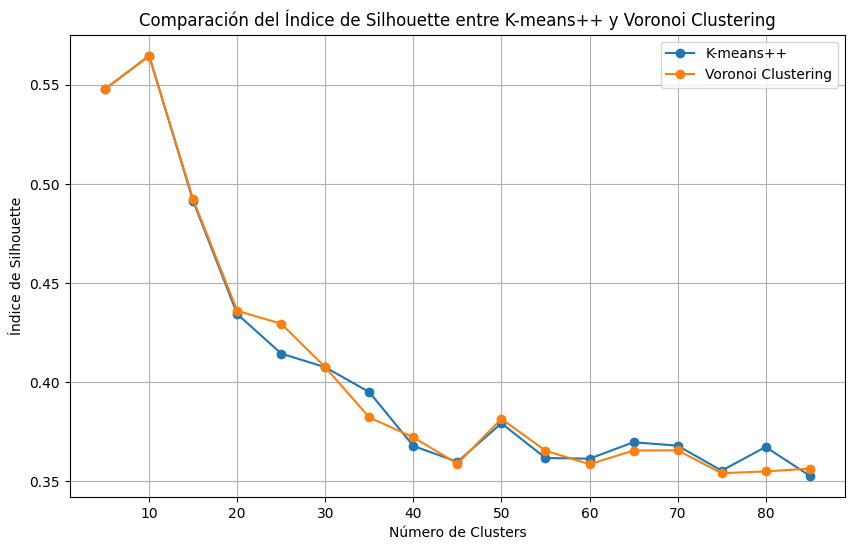

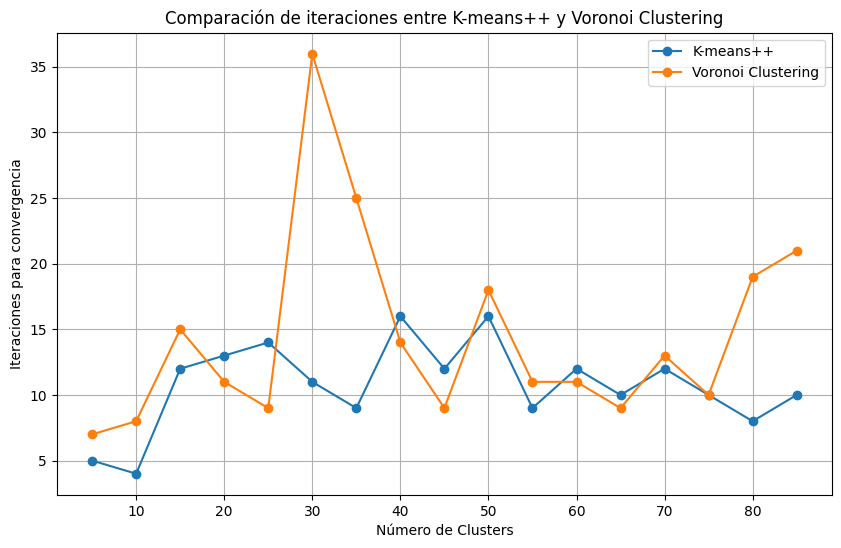

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores de clusters
cluster_range = list(range(5, 90, 5))

silhouette_kmeans_values = []
silhouette_voronoi_values = []
min_iter_kmeans_values = []
min_iter_voronoi_values = []


# Ejecutar CompareSilhouette para cada valor en el rango
for clusters in cluster_range:
    silhouette_kmeans, silhouette_voronoi, min_iter_voronoi, min_iter_kmeans = CompareSilhouette(0, clusters, 1, 10)
    silhouette_kmeans_values.append(silhouette_kmeans)
    silhouette_voronoi_values.append(silhouette_voronoi)
    min_iter_kmeans_values.append(min_iter_kmeans)
    min_iter_voronoi_values.append(min_iter_voronoi)


# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_kmeans_values, label='K-means++', marker='o')
plt.plot(cluster_range, silhouette_voronoi_values, label='Voronoi Clustering', marker='o')

plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhouette')
plt.title('Comparación del Índice de Silhouette entre K-means++ y Voronoi Clustering')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, min_iter_kmeans_values, label='K-means++', marker='o')
plt.plot(cluster_range, min_iter_voronoi_values, label='Voronoi Clustering', marker='o')

plt.xlabel('Número de Clusters')
plt.ylabel('Iteraciones para convergencia')
plt.title('Comparación de iteraciones entre K-means++ y Voronoi Clustering')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
print("Silhouette")
if len(silhouette_kmeans_values) > 0:
    print(f"Median: {np.median(silhouette_kmeans_values)}")

if len(silhouette_voronoi_values) > 0:
    print(f"Median: {np.median(silhouette_voronoi_values)}")

print("Iteraciones")
if len(min_iter_kmeans_values) > 0:
    print(f"Median: {np.median(min_iter_kmeans_values)} ")

if len(min_iter_voronoi_values) > 0:
    print(f"Median: {np.median(min_iter_voronoi_values)} ")


Silhouette
Median: 0.3696594291225754
Median: 0.3721292178020528
Iteraciones
Median: 11.0 
Median: 11.0 


Índice de Silhouette para K-means++: 0.5479
Índice de Silhouette para Voronoi Clustering: 0.5479
Índice de Silhouette para K-means++: 0.5647
Índice de Silhouette para Voronoi Clustering: 0.5645
Índice de Silhouette para K-means++: 0.4913
Índice de Silhouette para Voronoi Clustering: 0.4922
Índice de Silhouette para K-means++: 0.4343
Índice de Silhouette para Voronoi Clustering: 0.4360
Índice de Silhouette para K-means++: 0.4144
Índice de Silhouette para Voronoi Clustering: 0.4295
Índice de Silhouette para K-means++: 0.4075
Índice de Silhouette para Voronoi Clustering: 0.4075
Índice de Silhouette para K-means++: 0.3949
Índice de Silhouette para Voronoi Clustering: 0.3822
Índice de Silhouette para K-means++: 0.3678
Índice de Silhouette para Voronoi Clustering: 0.3721
Índice de Silhouette para K-means++: 0.3598
Índice de Silhouette para Voronoi Clustering: 0.3589
Índice de Silhouette para K-means++: 0.3792
Índice de Silhouette para Voronoi Clustering: 0.3815
Índice de Silhouette para K-me

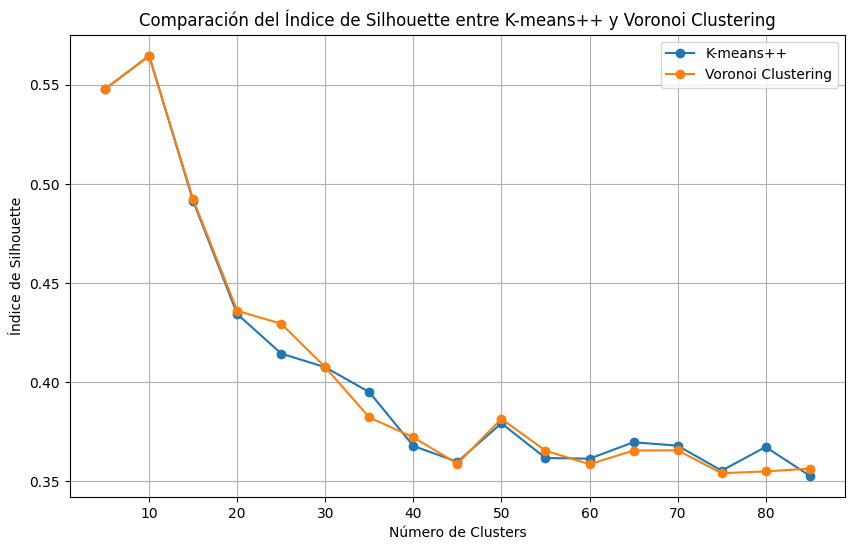

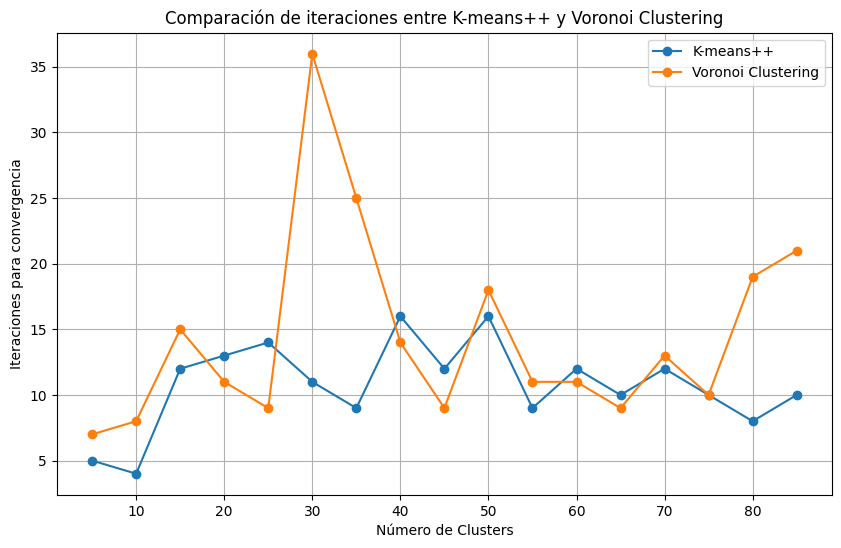

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores de clusters
cluster_range = list(range(5, 90, 5))

silhouette_kmeans_values = []
silhouette_voronoi_values = []
min_iter_kmeans_values = []
min_iter_voronoi_values = []


# Ejecutar CompareSilhouette para cada valor en el rango
for clusters in cluster_range:
    silhouette_kmeans, silhouette_voronoi, min_iter_voronoi, min_iter_kmeans = CompareSilhouette(0, clusters, 1)
    silhouette_kmeans_values.append(silhouette_kmeans)
    silhouette_voronoi_values.append(silhouette_voronoi)
    min_iter_kmeans_values.append(min_iter_kmeans)
    min_iter_voronoi_values.append(min_iter_voronoi)


# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_kmeans_values, label='K-means++', marker='o')
plt.plot(cluster_range, silhouette_voronoi_values, label='Voronoi Clustering', marker='o')

plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhouette')
plt.title('Comparación del Índice de Silhouette entre K-means++ y Voronoi Clustering')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, min_iter_kmeans_values, label='K-means++', marker='o')
plt.plot(cluster_range, min_iter_voronoi_values, label='Voronoi Clustering', marker='o')

plt.xlabel('Número de Clusters')
plt.ylabel('Iteraciones para convergencia')
plt.title('Comparación de iteraciones entre K-means++ y Voronoi Clustering')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Silhouette")
if len(silhouette_kmeans_values) > 0:
    print(f"Median: {np.median(silhouette_kmeans_values)}")

if len(silhouette_voronoi_values) > 0:
    print(f"Median: {np.median(silhouette_voronoi_values)}")

print("Iteraciones")
if len(min_iter_kmeans_values) > 0:
    print(f"Median: {np.median(min_iter_kmeans_values)} ")

if len(min_iter_voronoi_values) > 0:
    print(f"Median: {np.median(min_iter_voronoi_values)} ")


Silhouette
Median: 0.3696594291225754
Median: 0.3721292178020528
Iteraciones
Median: 11.0 
Median: 11.0 


In [ ]:
def CompareStd():

  cluster_std = np.arange(0.4, 1.6, 0.2)
  # Rango de valores de clusters
  cluster_range = list(range(5, 90, 5))

  for clusterStd in cluster_std:
    silhouette_kmeans_values = []
    silhouette_voronoi_values = []
    min_iter_kmeans_values = []
    min_iter_voronoi_values = []
    for clusters in cluster_range:
      silhouette_kmeans, silhouette_voronoi, min_iter_voronoi, min_iter_kmeans = CompareSilhouette(0, clusters, clusterStd = clusterStd, printFlag = False)
      silhouette_kmeans_values.append(silhouette_kmeans)
      silhouette_voronoi_values.append(silhouette_voronoi)
      min_iter_kmeans_values.append(min_iter_kmeans)
      min_iter_voronoi_values.append(min_iter_voronoi)
    print(f"Std : {clusterStd}")
    if len(silhouette_kmeans_values) > 0:
        print(f"Silhouette median: kmeans++: {np.median(silhouette_kmeans_values)}, voronoi : {np.median(silhouette_voronoi_values)}")
        print(f"Iteraciones median: kmeans++: {np.median(min_iter_kmeans_values)}, voronoi : {np.median(min_iter_voronoi_values)}")

In [ ]:
CompareStd()

Std : 0.4
Silhouette median: kmeans++: 0.5570818274975995, voronoi : 0.5428512596079371
Iteraciones median: kmeans++: 6.0, voronoi : 7.0
Std : 0.6000000000000001
Silhouette median: kmeans++: 0.4445391950939492, voronoi : 0.4484772526581693
Iteraciones median: kmeans++: 7.0, voronoi : 9.0
Std : 0.8000000000000002
Silhouette median: kmeans++: 0.3925099793348645, voronoi : 0.3910737762976836
Iteraciones median: kmeans++: 10.0, voronoi : 12.0
Std : 1.0000000000000002
Silhouette median: kmeans++: 0.36965942912257543, voronoi : 0.3721292178020528
Iteraciones median: kmeans++: 11.0, voronoi : 11.0
Std : 1.2000000000000002
Silhouette median: kmeans++: 0.3617711834779217, voronoi : 0.35383453820364097
Iteraciones median: kmeans++: 12.0, voronoi : 16.0
Std : 1.4000000000000004
Silhouette median: kmeans++: 0.35572561114429574, voronoi : 0.35442808243004115
Iteraciones median: kmeans++: 12.0, voronoi : 16.0
Std : 1.6000000000000005
Silhouette median: kmeans++: 0.3550860731840918, voronoi : 0.34930

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_espiral(n_puntos, n_clases):
    X = np.zeros((n_puntos * n_clases, 2))  # Inicializa la matriz de puntos
    y = np.zeros(n_puntos * n_clases, dtype='uint8')  # Etiquetas

    for clase in range(n_clases):
        ix = range(n_puntos * clase, n_puntos * (clase + 1))  # Índices
        r = np.linspace(0.0, 1, n_puntos)  # Radio
        t = np.linspace(clase * 4, (clase + 1) * 4, n_puntos) + np.random.randn(n_puntos) * 0.2  # Theta (ángulo)
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]  # Coordenadas en 2D
        y[ix] = clase

    return X, y

# Generar el dataset de espiral
n_puntos = 1000
n_clases = 3
X, y = generar_espiral(n_puntos, n_clases)


Índice de Silhouette para Voronoi Clustering: 0.3569


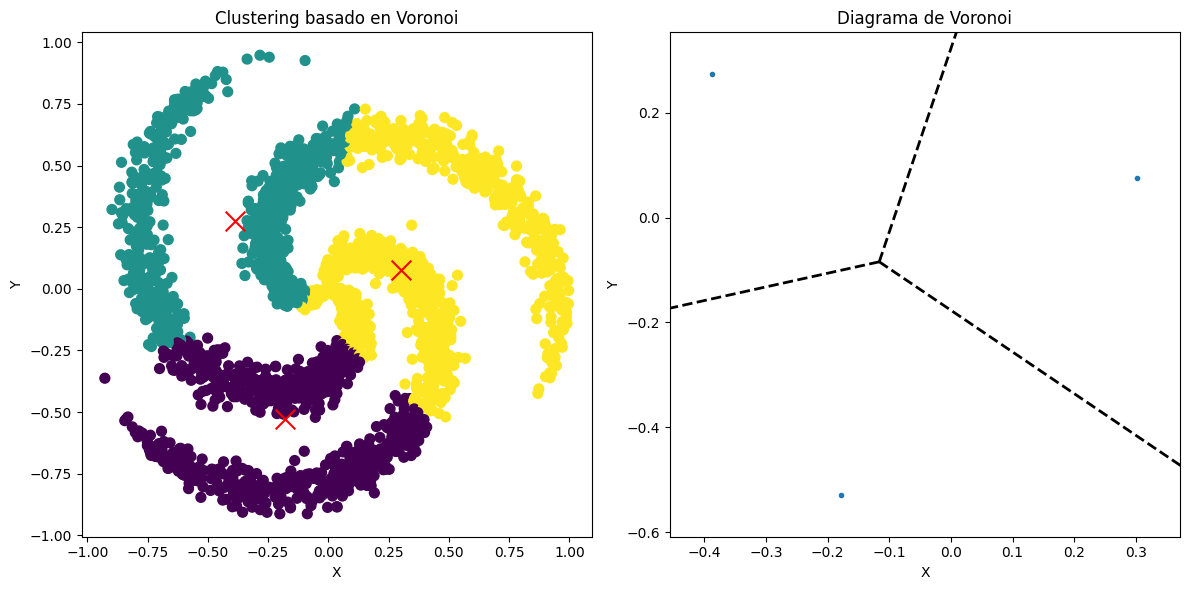

In [ ]:
labels, vor, centroids, min_iter = voronoi_clustering_kmeans_plus(X, 3, n_init = 10)
silhouette_voronoi = silhouette_score(X, labels)
print(f"Índice de Silhouette para Voronoi Clustering: {silhouette_voronoi:.4f}")
PlotExecution(X, centroids, vor)